# Part 3.1 | Data vs the Population

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 20,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

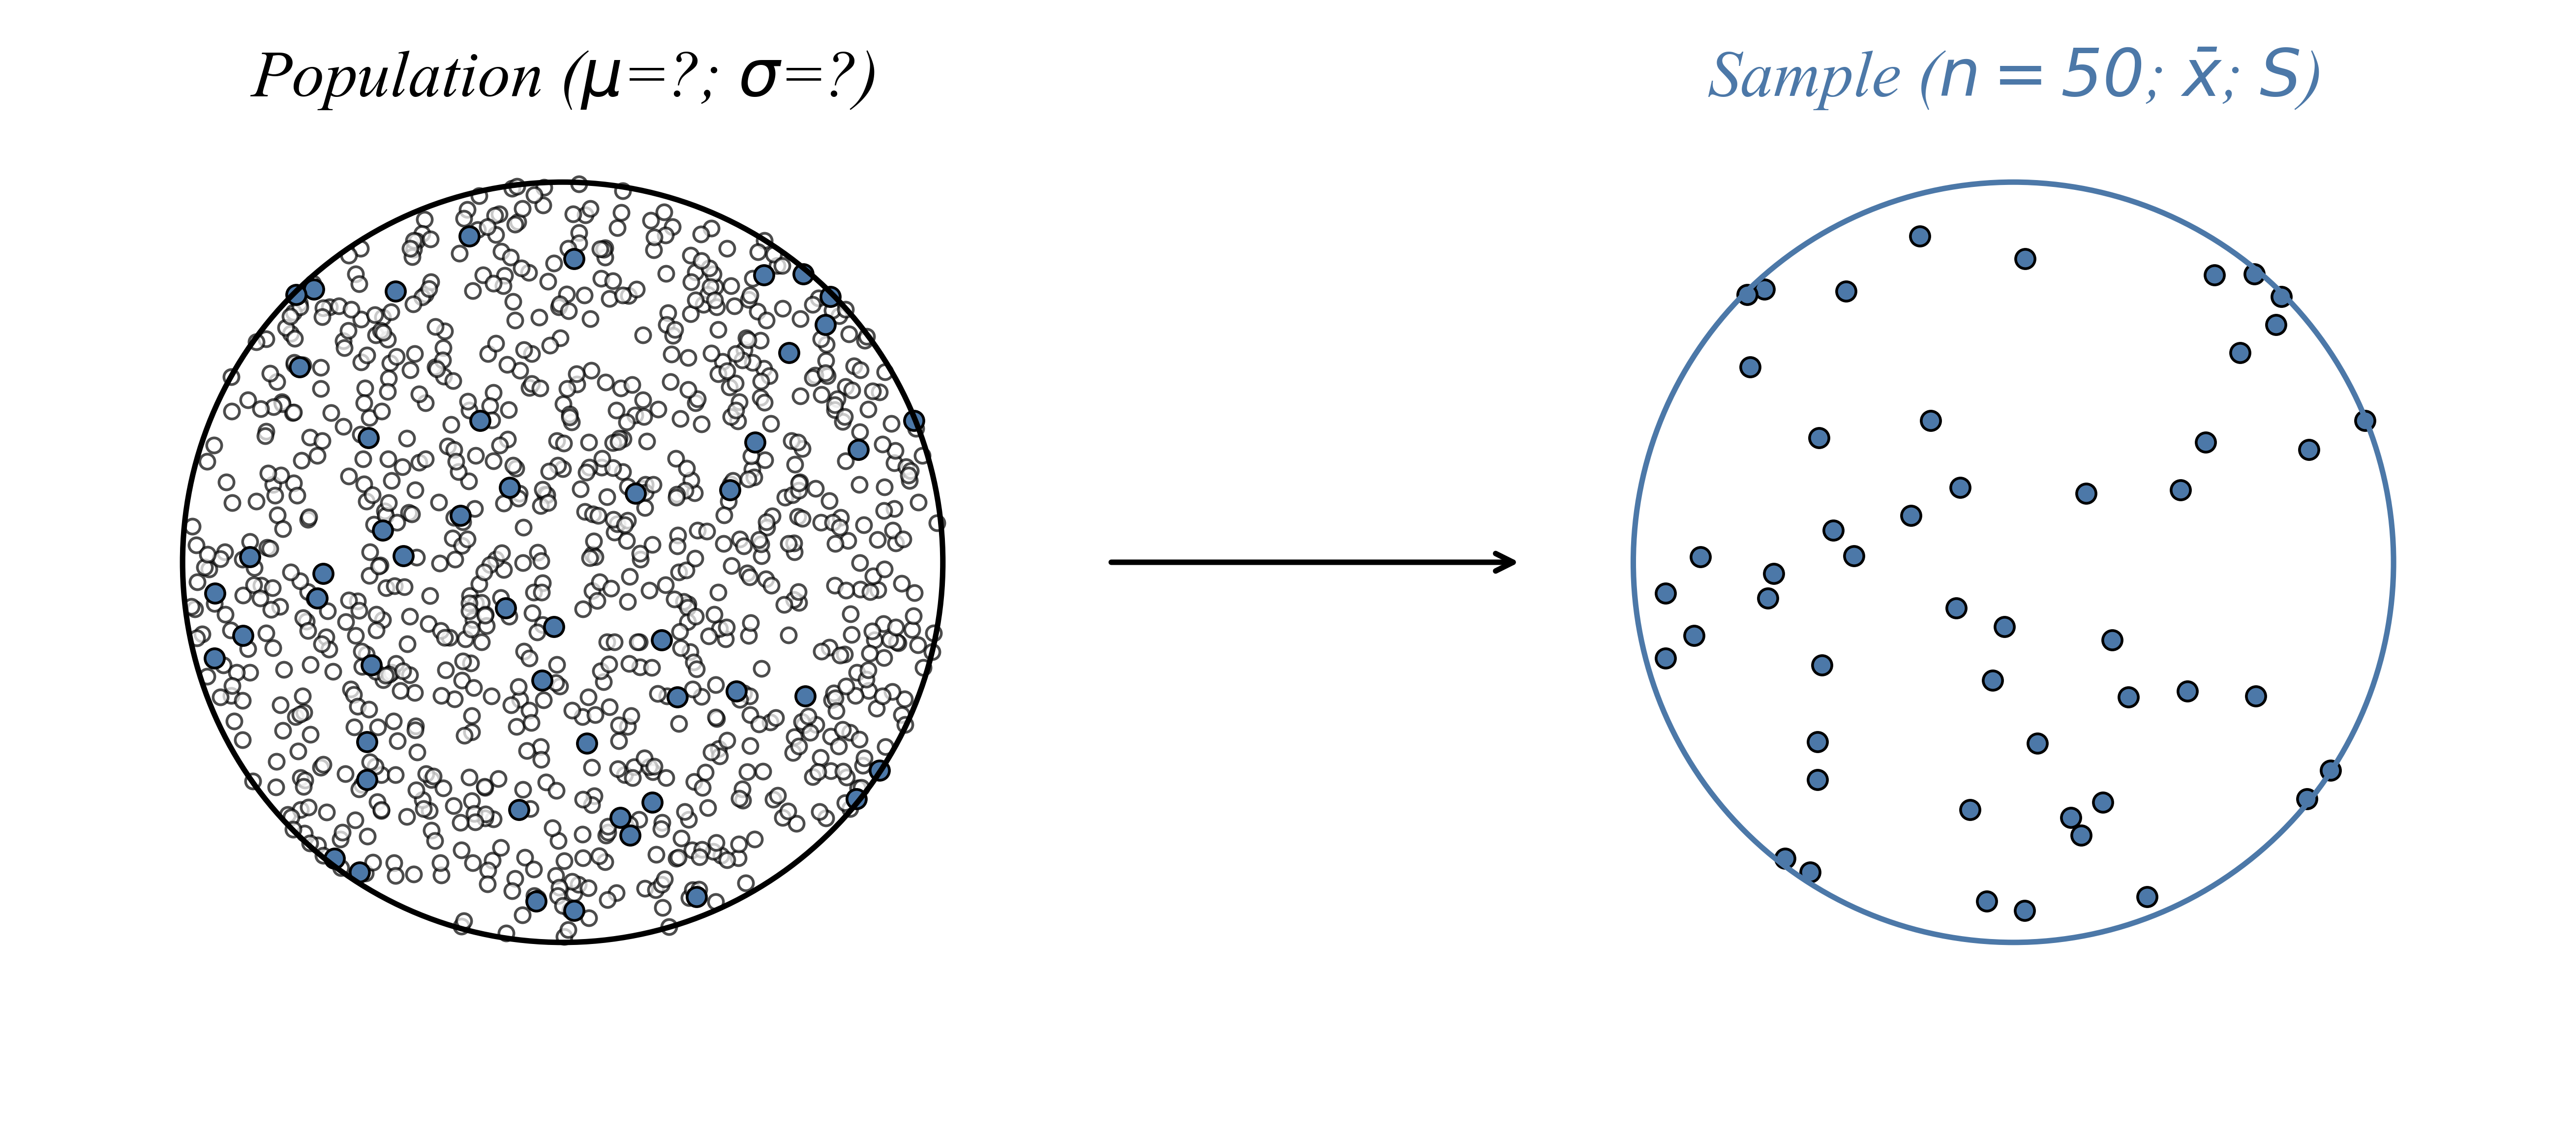

In [3]:
from matplotlib.patches import Circle
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Parameters
n_population = 1000  # Generate more points than needed
circle_radius = 35
center_x, center_y = 50, 50

# Generate random points in a circular pattern
theta = np.random.uniform(0, 2*np.pi, n_population)
r = circle_radius * np.sqrt(np.random.uniform(0, 1, n_population))  # Square root for uniform density
population_x = center_x + r * np.cos(theta)
population_y = center_y + r * np.sin(theta)

# Keep only points inside the circle (this is redundant with our generation method but ensures clarity)
distances = np.sqrt((population_x - center_x)**2 + (population_y - center_y)**2)
inside_circle = distances <= circle_radius
population_x = population_x[inside_circle]
population_y = population_y[inside_circle]

# Recalculate population size after filtering
n_population = len(population_x)

# Sample size
n_sample = 50

# Randomly select indices for sample
sample_indices = random.sample(range(n_population), n_sample)
is_in_sample = np.zeros(n_population, dtype=bool)
is_in_sample[sample_indices] = True

# Plot 1: Population with sampled points highlighted
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.set_aspect('equal')

# Plot population points
ax1.scatter(population_x[~is_in_sample], population_y[~is_in_sample], 
           s=30, alpha=0.7, color='white', edgecolor='black')

# Highlight sample points within population
ax1.scatter(population_x[is_in_sample], population_y[is_in_sample], 
           s=50, alpha=1.0, color='#4C78A8', edgecolor='black')

# Draw a boundary around the population
population_circle = Circle(xy=(center_x, center_y), radius=circle_radius, 
                          edgecolor='black', fc='none', lw=2, ls='-')
ax1.add_patch(population_circle)
ax1.text(center_x, center_y + circle_radius + 8, "Population ($\\mu$=?; $\\sigma$=?)", ha='center', fontsize=24)

# Plot 2: Just the sample
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 100)
ax2.set_aspect('equal')

# Plot the sample points (same coordinates and color as in population)
ax2.scatter(population_x[is_in_sample], population_y[is_in_sample], 
           s=50, alpha=1.0, color='#4C78A8', edgecolor='black')

# Draw sample boundary
sample_circle = Circle(xy=(center_x, center_y), radius=circle_radius,
                      edgecolor='#4C78A8', fc='none', lw=2, ls='-')
ax2.add_patch(sample_circle)
ax2.text(center_x, center_y + circle_radius + 8, "Sample ($n=50$; $\\bar{x}$; $S$)", 
         ha='center', fontsize=24, color='#4C78A8')

# Remove axes from both plots
for ax in [ax1, ax2]:
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

# Add arrow connecting population to sample
plt.annotate('', xy=(0.05, 0.5), xytext=(1, 0.5), 
             xycoords=ax2.transAxes, textcoords=ax1.transAxes,
             arrowprops=dict(arrowstyle='->', color='black', lw=2))

plt.tight_layout()
plt.savefig('i/sample.png')

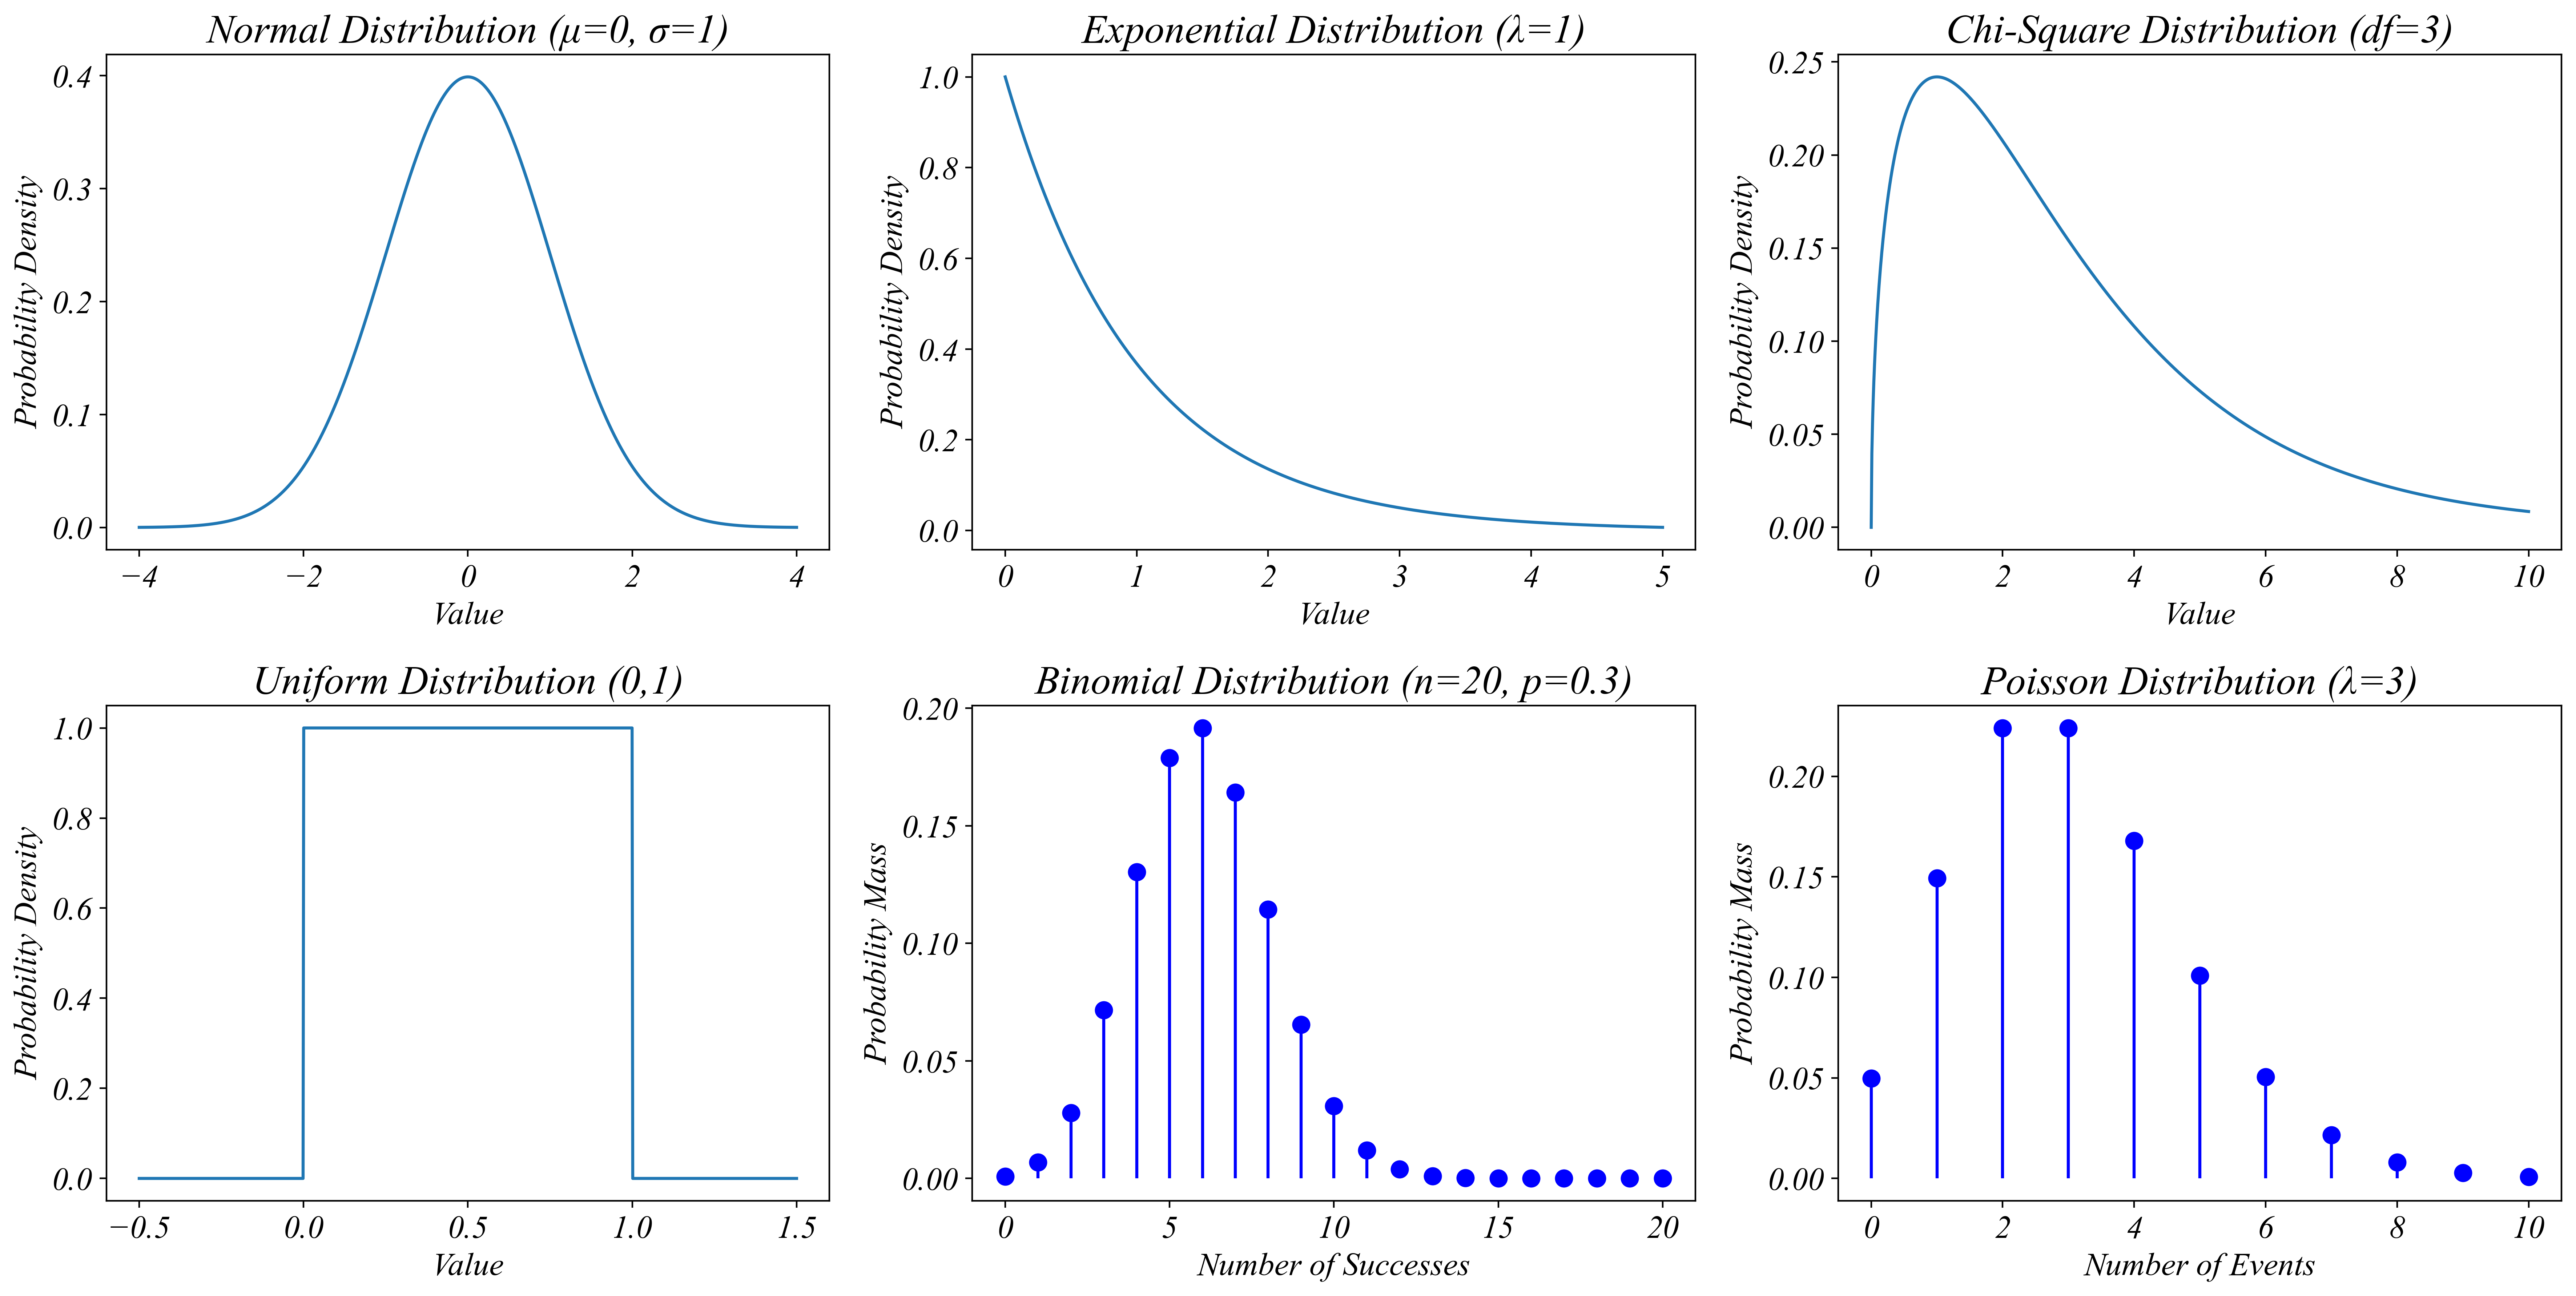

In [5]:
from scipy import stats

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Normal Distribution
x_normal = np.linspace(-4, 4, 1000)
y_normal = stats.norm.pdf(x_normal, loc=0, scale=1)
axes[0,0].plot(x_normal, y_normal)
axes[0,0].set_title('Normal Distribution (μ=0, σ=1)')
axes[0,0].set_xlabel('Value')
axes[0,0].set_ylabel('Probability Density')

# Exponential Distribution
x_exp = np.linspace(0, 5, 1000)
y_exp = stats.expon.pdf(x_exp, scale=1)
axes[0,1].plot(x_exp, y_exp)
axes[0,1].set_title('Exponential Distribution (λ=1)')
axes[0,1].set_xlabel('Value')
axes[0,1].set_ylabel('Probability Density')

# Uniform Distribution
x_uniform = np.linspace(-0.5, 1.5, 1000)
y_uniform = stats.uniform.pdf(x_uniform, loc=0, scale=1)
axes[1,0].plot(x_uniform, y_uniform)
axes[1,0].set_title('Uniform Distribution (0,1)')
axes[1,0].set_xlabel('Value')
axes[1,0].set_ylabel('Probability Density')

# Binomial Distribution
x_binom = np.arange(0, 21)
y_binom = stats.binom.pmf(x_binom, n=20, p=0.3)
axes[1,1].vlines(x_binom, 0, y_binom, colors='blue')
axes[1,1].plot(x_binom, y_binom, 'bo', ms=8)
axes[1,1].set_title('Binomial Distribution (n=20, p=0.3)')
axes[1,1].set_xlabel('Number of Successes')
axes[1,1].set_ylabel('Probability Mass')

# Poisson Distribution
x_poisson = np.arange(0, 11)
y_poisson = stats.poisson.pmf(x_poisson, mu=3)
axes[1,2].vlines(x_poisson, 0, y_poisson, colors='blue')
axes[1,2].plot(x_poisson, y_poisson, 'bo', ms=8)
axes[1,2].set_title('Poisson Distribution (λ=3)')
axes[1,2].set_xlabel('Number of Events')
axes[1,2].set_ylabel('Probability Mass')

# Chi-Square Distribution
x_chi2 = np.linspace(0, 10, 1000)
y_chi2 = stats.chi2.pdf(x_chi2, df=3)
axes[0,2].plot(x_chi2, y_chi2)
axes[0,2].set_title('Chi-Square Distribution (df=3)')
axes[0,2].set_xlabel('Value')
axes[0,2].set_ylabel('Probability Density')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('i/distributions.png')

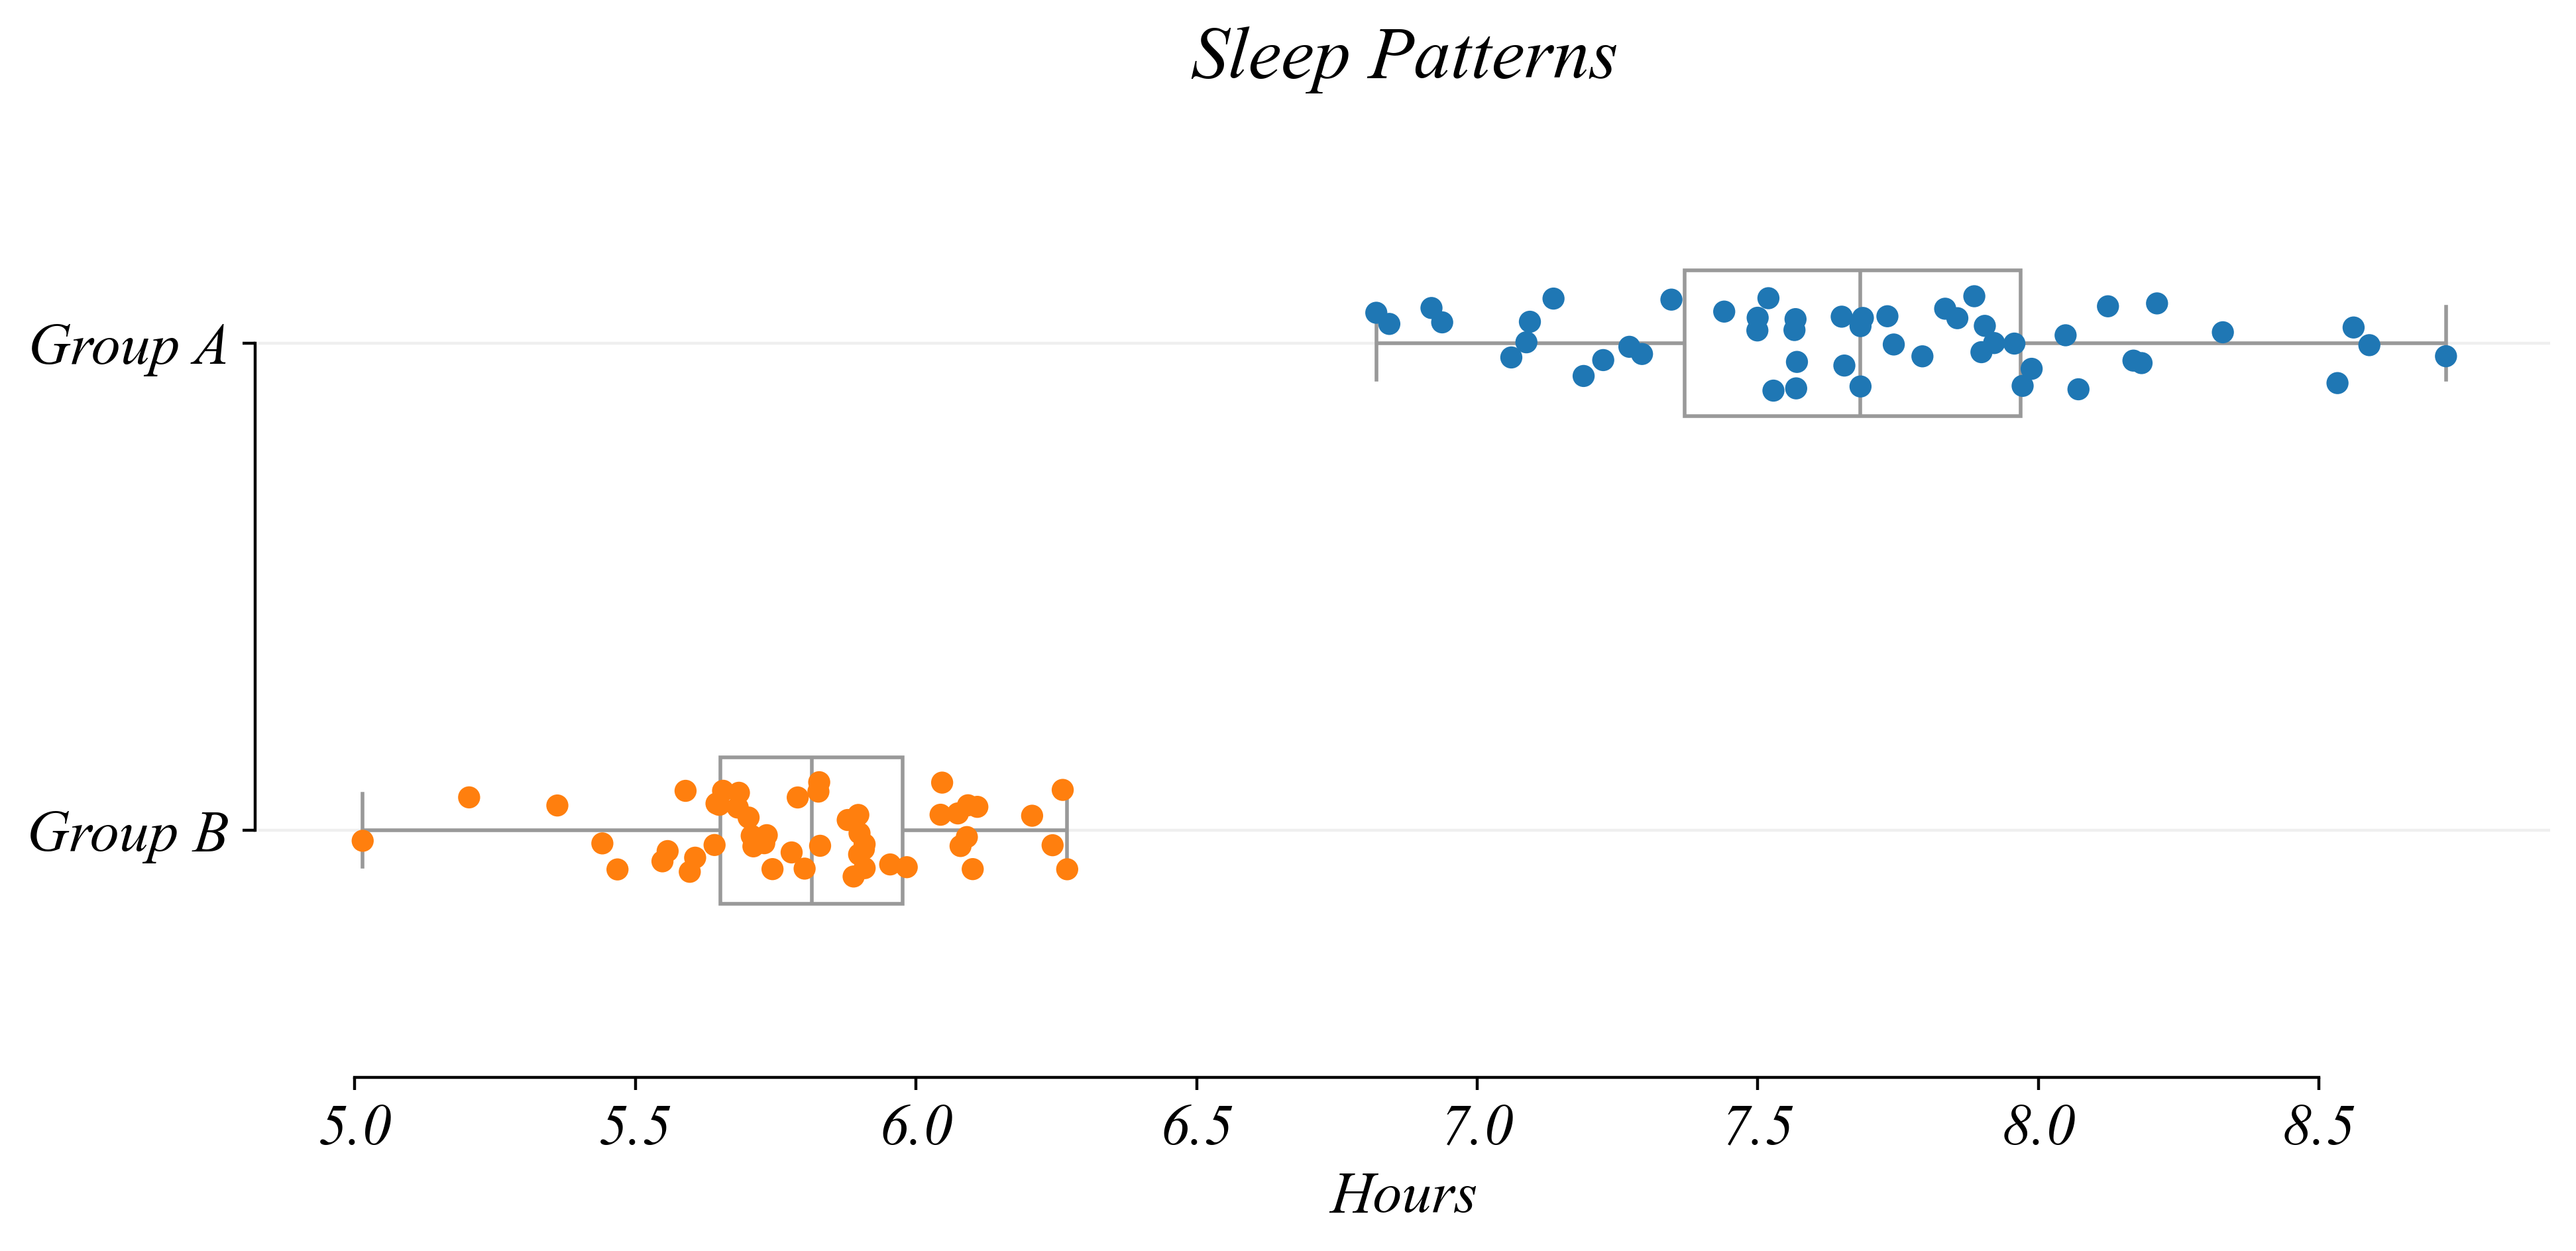

In [8]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sleep data for two groups
group_A_x = np.random.normal(7.8, 0.5, 50)  # Higher mean, higher variance
group_B_x = np.random.normal(5.8, 0.3, 50)  # Lower mean, lower variance

# Create dataframe
sleep_data_x = pd.DataFrame({
    'Hours': np.concatenate([group_A_x, group_B_x]),
    'Group': ['Group A']*50 + ['Group B']*50
})

# Figure
fig, ax = plt.subplots(figsize=(10, 5))

# Boxplot + stripplot
sns.boxplot(sleep_data_x, y='Group', x='Hours', ax=ax, width=0.3, color='white', whis=(0, 100))
sns.stripplot(sleep_data_x, y='Group', x='Hours', ax=ax, size=6, hue='Group')

# Styling
ax.set_ylabel('')
ax.set_title('Sleep Patterns')
ax.grid(True, alpha=0.2, axis='y')
sns.despine(trim=True, offset=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_01.png')

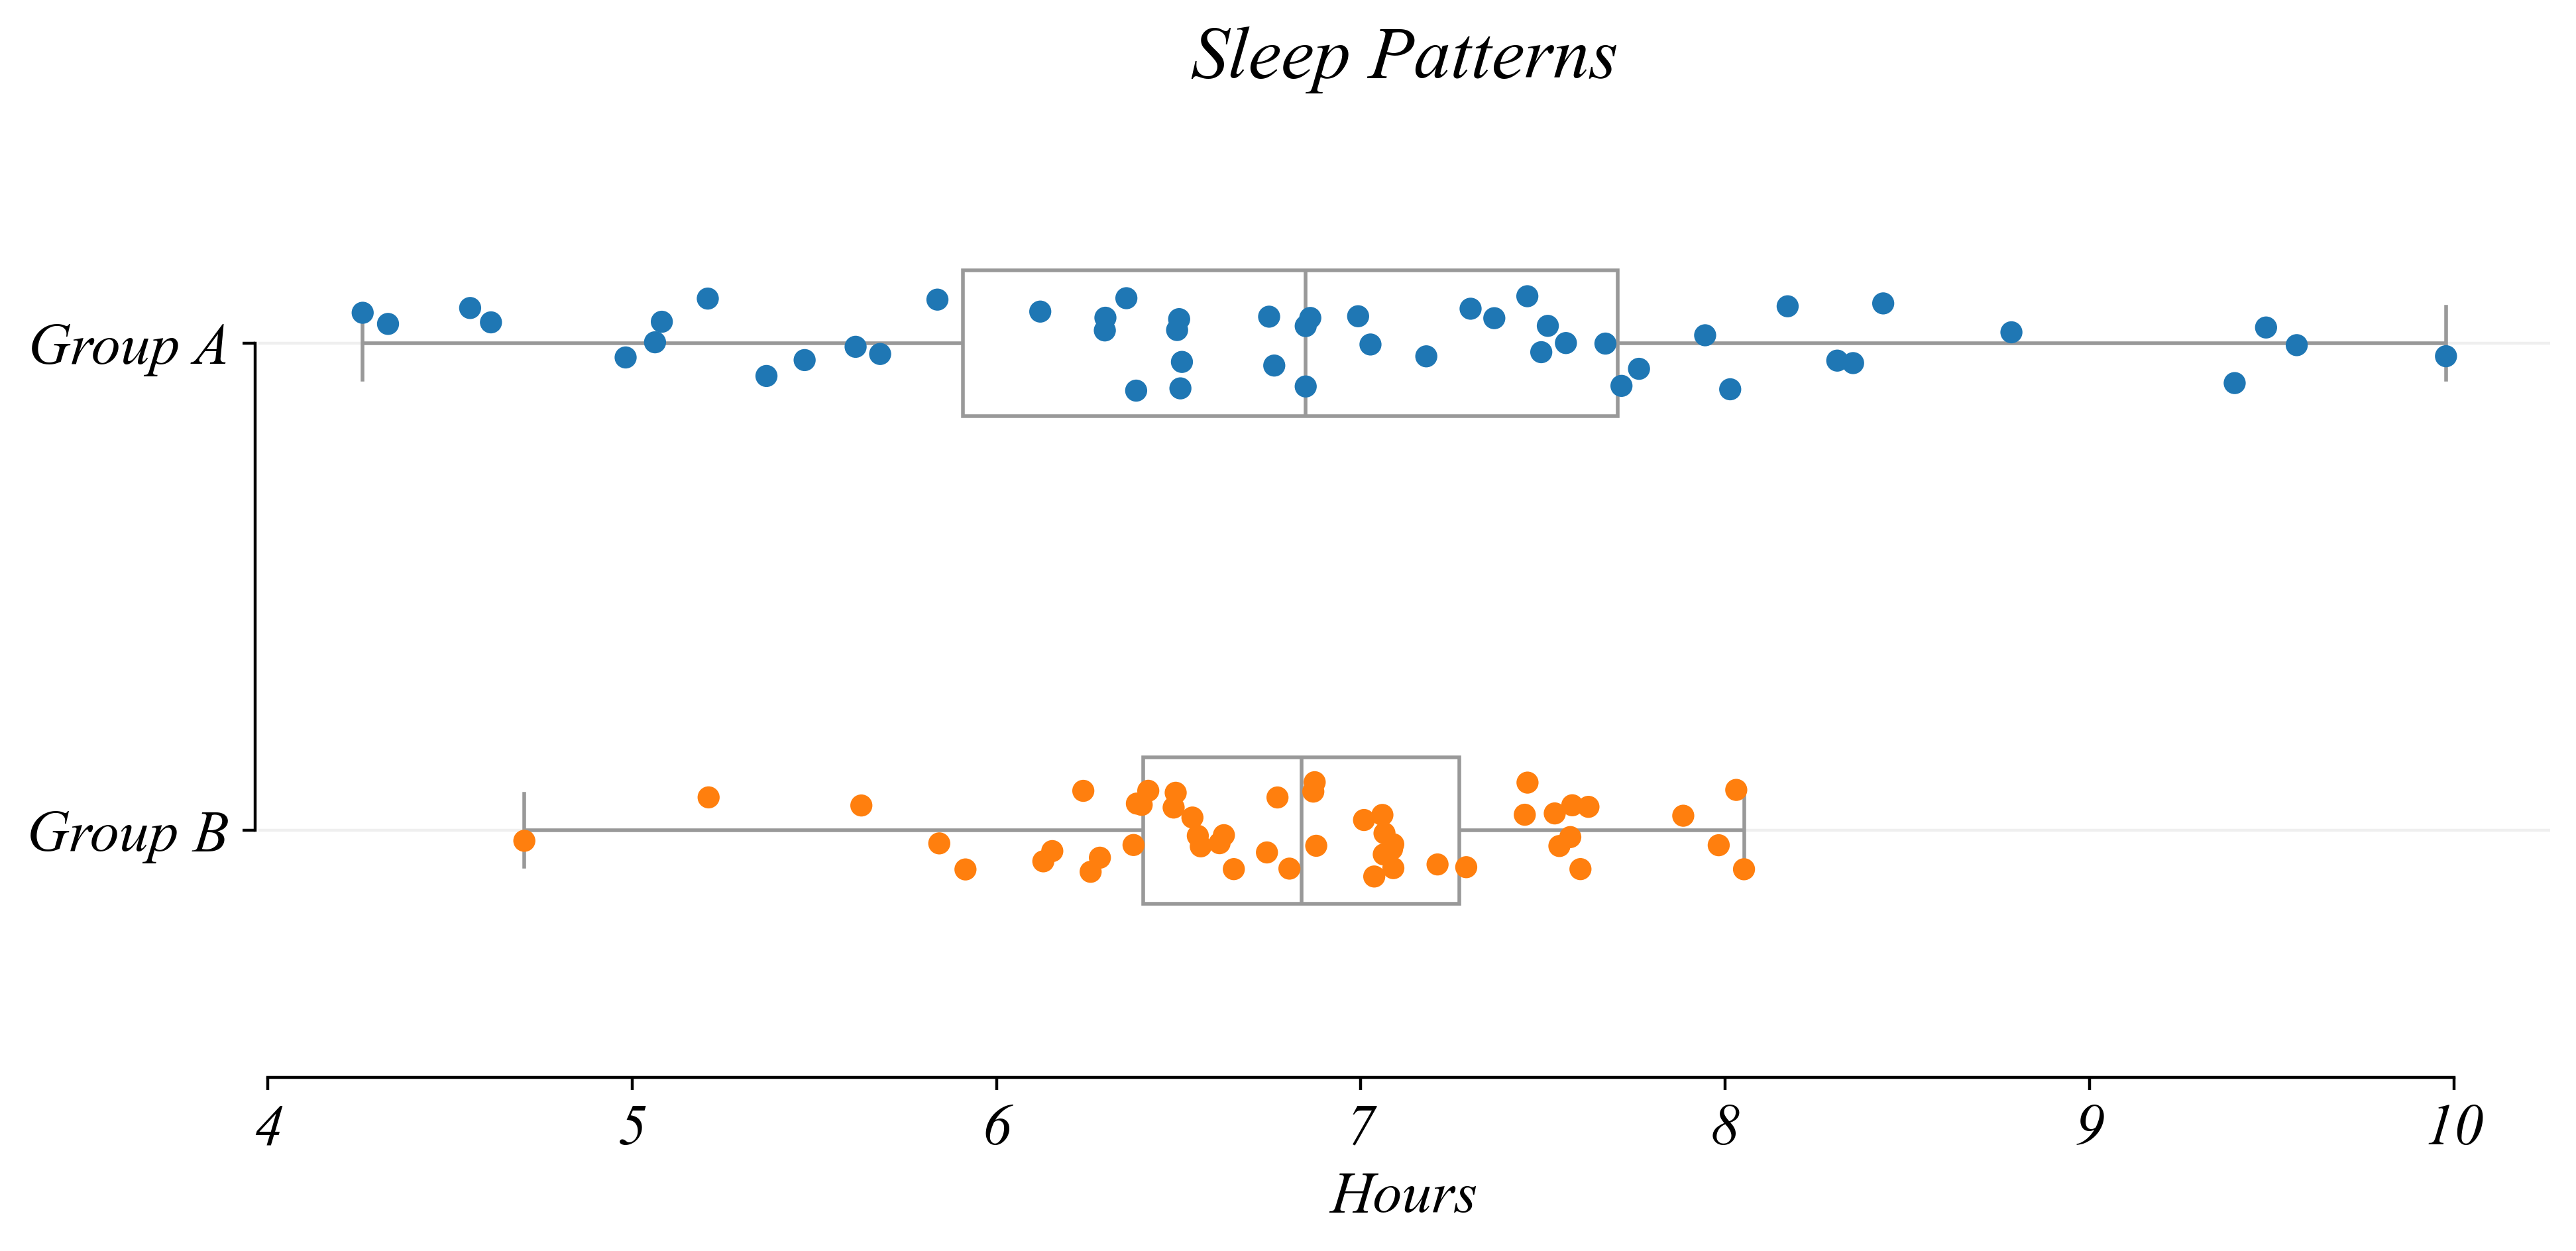

In [12]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sleep data for two groups
group_A = np.random.normal(7.2, 1.5, 50)  # Higher mean, higher variance
group_B = np.random.normal(6.8, 0.8, 50)  # Lower mean, lower variance

# Create dataframe
sleep_data = pd.DataFrame({
    'Hours': np.concatenate([group_A, group_B]),
    'Group': ['Group A']*50 + ['Group B']*50
})

# Figure
fig, ax = plt.subplots(figsize=(10, 5))

# Boxplot + stripplot
sns.boxplot(sleep_data, y='Group', x='Hours', ax=ax, width=0.3, color='white', whis=(0, 100))
sns.stripplot(sleep_data, y='Group', x='Hours', ax=ax, size=6, hue='Group')

# Styling
ax.set_ylabel('')
ax.set_title('Sleep Patterns')
ax.grid(True, alpha=0.2, axis='y')
sns.despine(trim=True, offset=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_02.png')

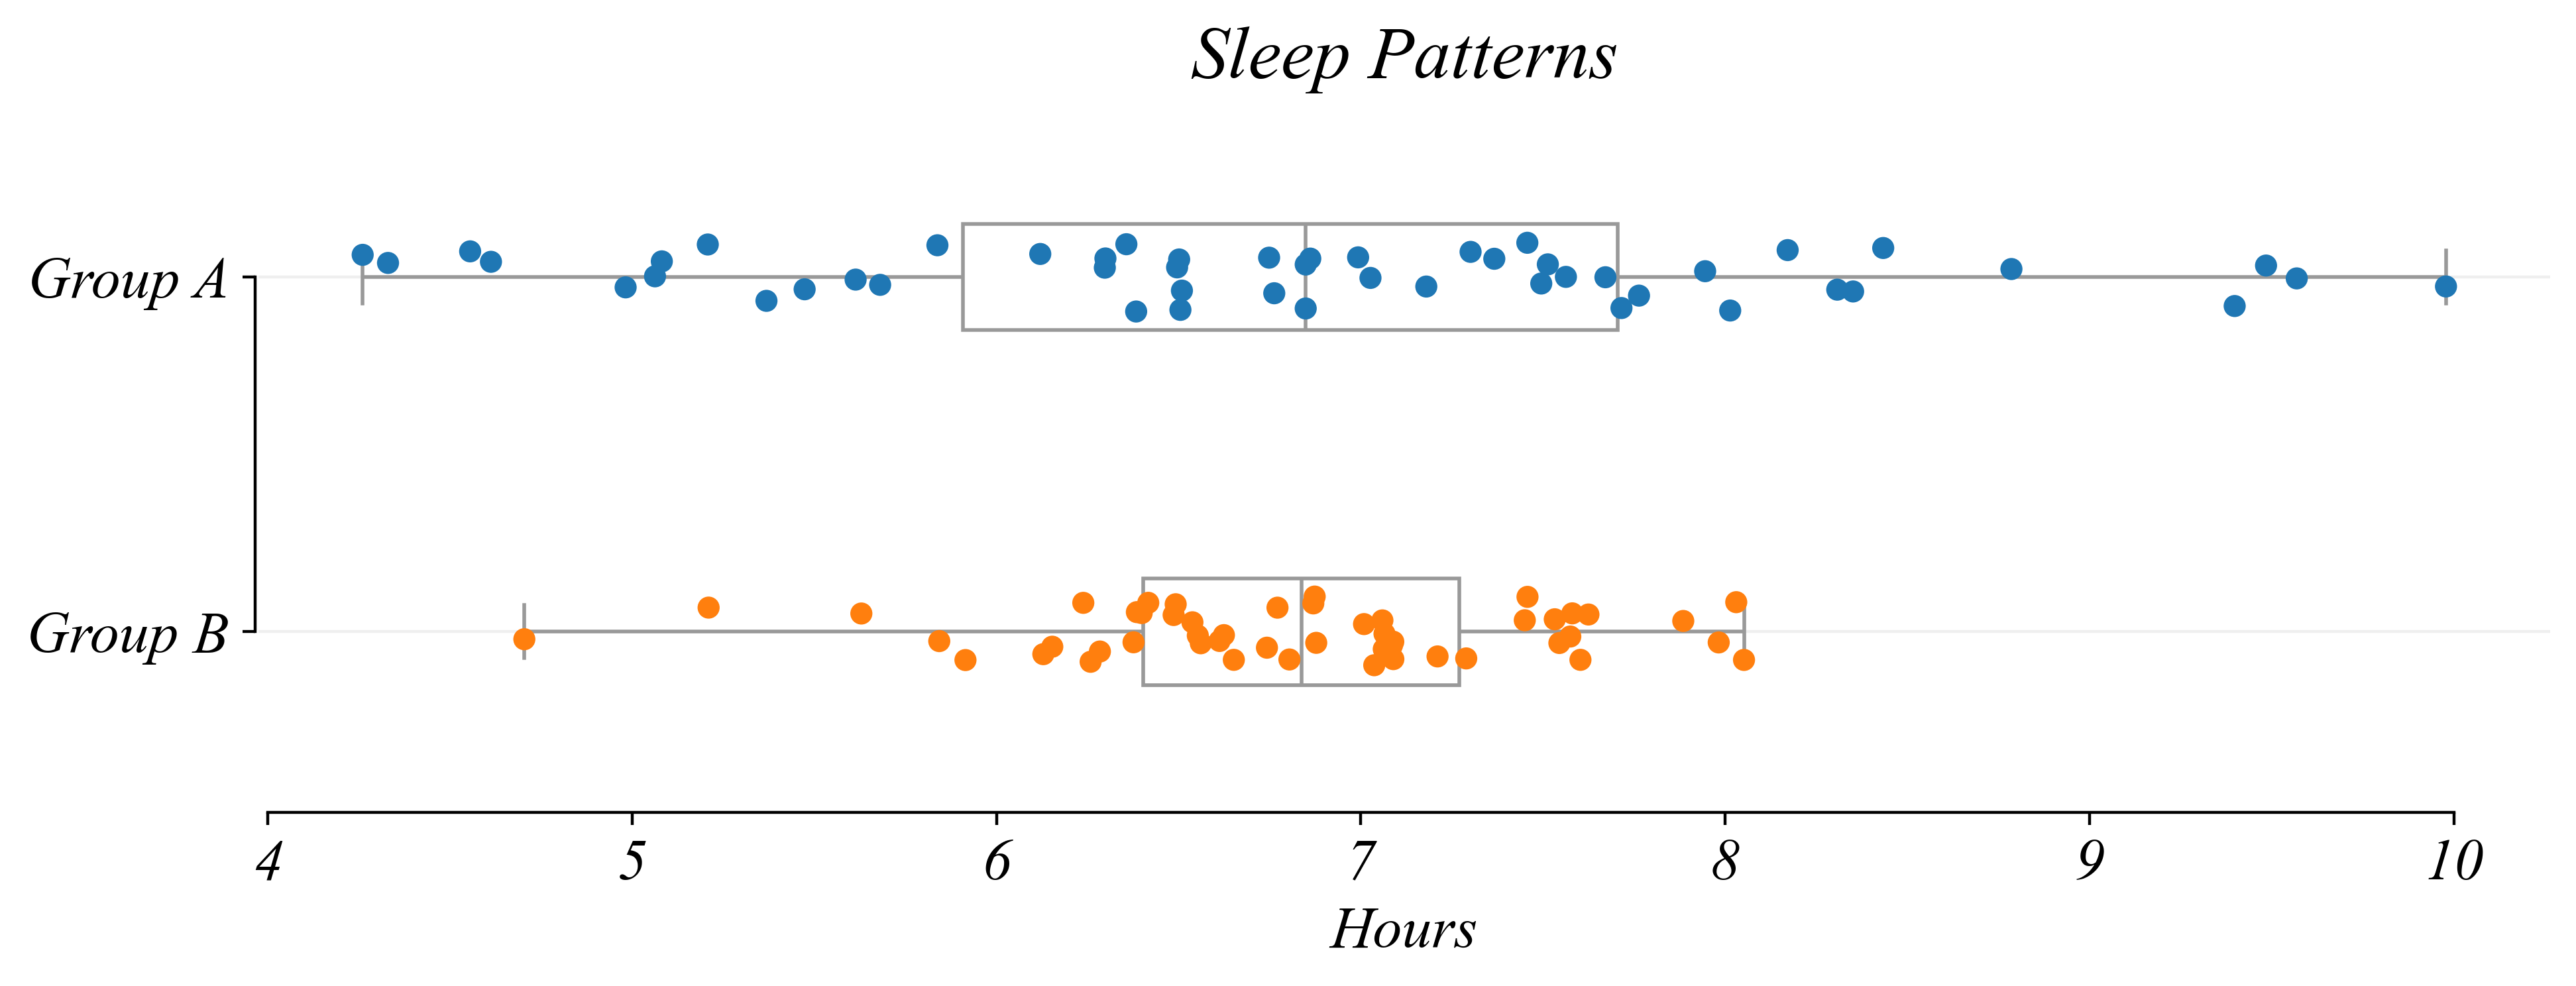

In [11]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sleep data for two groups
group_A = np.random.normal(7.2, 1.5, 50)  # Higher mean, higher variance
group_B = np.random.normal(6.8, 0.8, 50)  # Lower mean, lower variance

# Create dataframe
sleep_data = pd.DataFrame({
    'Hours': np.concatenate([group_A, group_B]),
    'Group': ['Group A']*50 + ['Group B']*50
})

# Figure
fig, ax = plt.subplots(figsize=(10, 4))

# Boxplot + stripplot
sns.boxplot(sleep_data, y='Group', x='Hours', ax=ax, width=0.3, color='white', whis=(0, 100))
sns.stripplot(sleep_data, y='Group', x='Hours', ax=ax, size=6, hue='Group')

# Styling
ax.set_ylabel('')
ax.set_title('Sleep Patterns')
ax.grid(True, alpha=0.2, axis='y')
sns.despine(trim=True, offset=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/c_03.png')

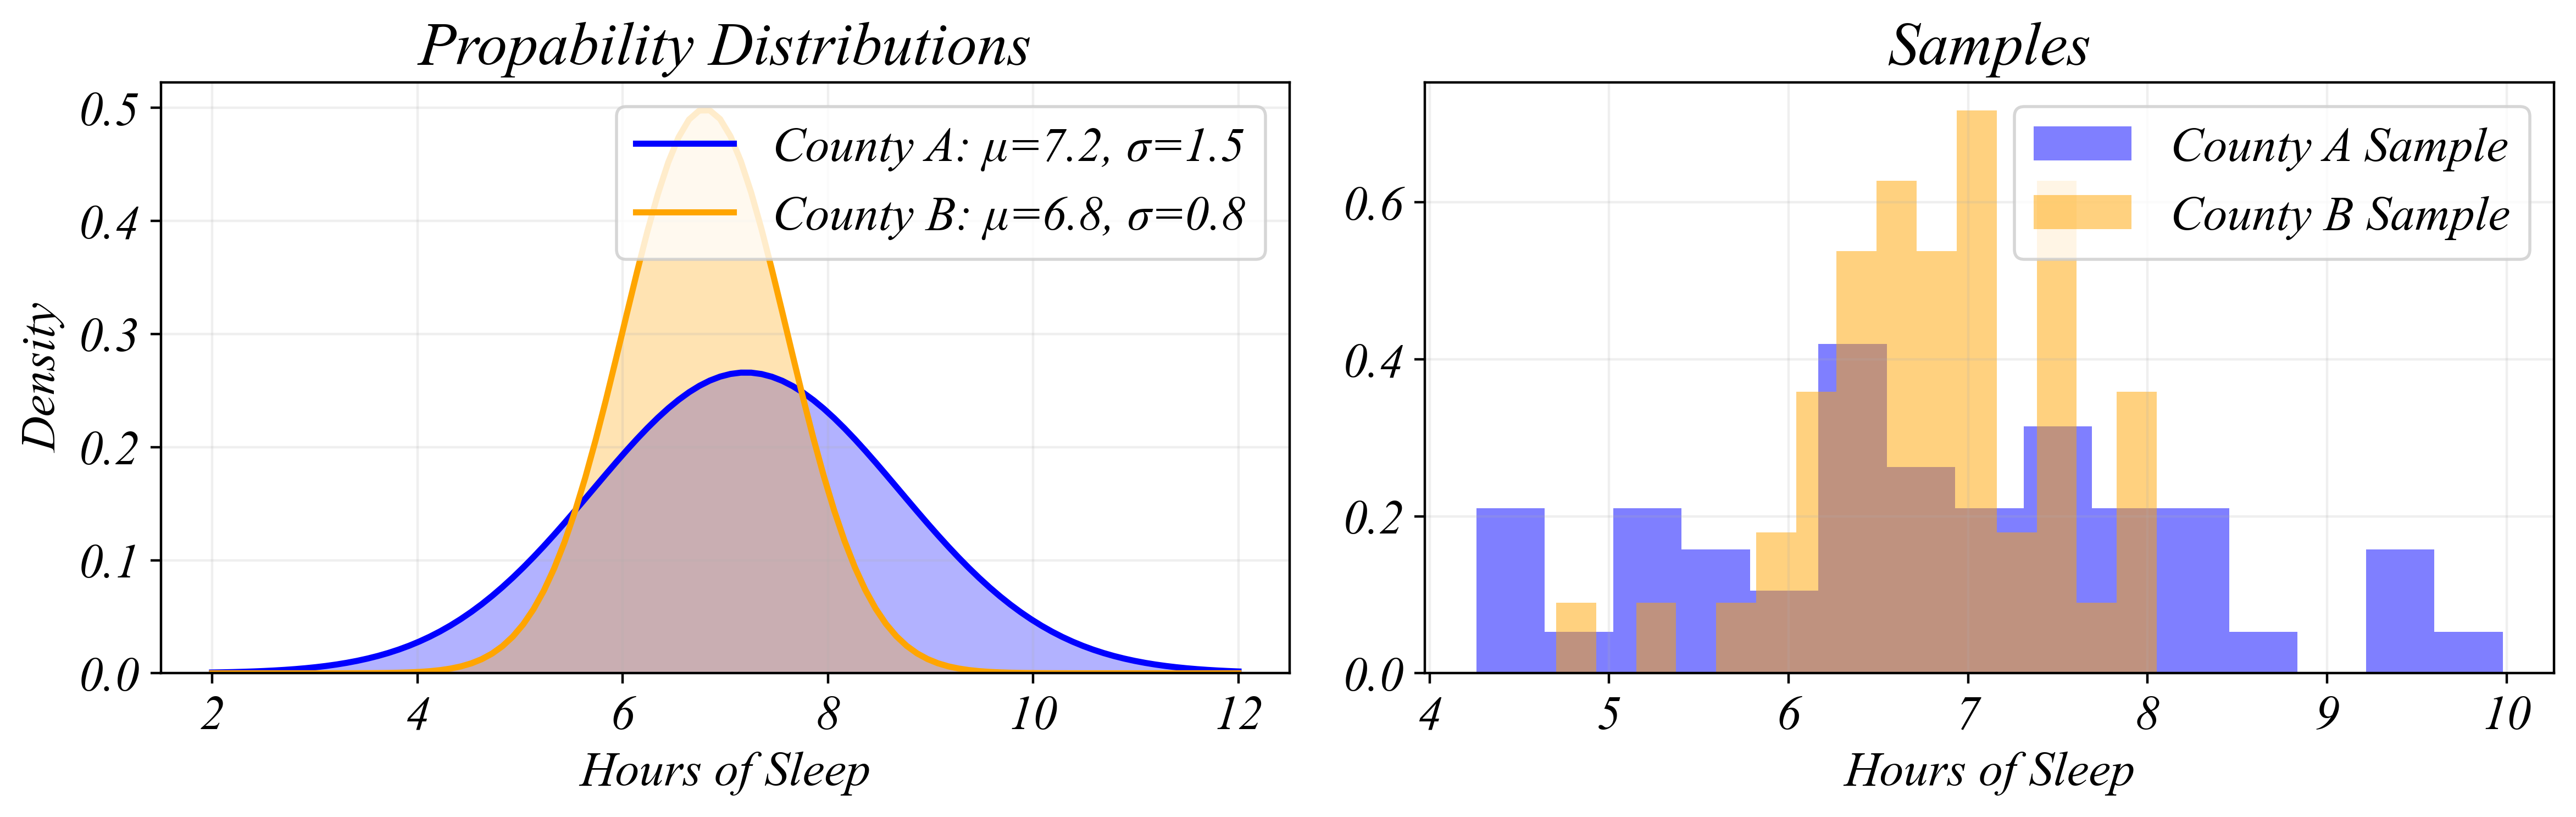

In [15]:
# Visualize the true distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Left: The theoretical distributions
x = np.linspace(2, 12, 100)
y_A = (1/np.sqrt(2*np.pi*1.5**2)) * np.exp(-(x-7.2)**2/(2*1.5**2))
y_B = (1/np.sqrt(2*np.pi*0.8**2)) * np.exp(-(x-6.8)**2/(2*0.8**2))

ax1.plot(x, y_A, label='County A: μ=7.2, σ=1.5', color='blue', linewidth=2)
ax1.plot(x, y_B, label='County B: μ=6.8, σ=0.8', color='orange', linewidth=2)
ax1.fill_between(x, y_A, alpha=0.3, color='blue')
ax1.fill_between(x, y_B, alpha=0.3, color='orange')
ax1.set_xlabel('Hours of Sleep')
ax1.set_ylabel('Density')
ax1.set_title('Propability Distributions')
ax1.legend()
ax1.grid(True, alpha=0.2)
ax1.set_ylim(0)

# Right: Our samples
ax2.hist(group_A, alpha=0.5, label='County A Sample', bins=15, density=True, color='blue')
ax2.hist(group_B, alpha=0.5, label='County B Sample', bins=15, density=True, color='orange')
ax2.set_xlabel('Hours of Sleep')
ax2.set_ylabel('')
ax2.set_title('Samples')
ax2.legend()
ax2.grid(True, alpha=0.2)
ax2.set_ylim(0)

plt.tight_layout()

plt.savefig('i/c_04.png')

## Exercise 3.1

Expected wait time: 7.5 minutes
P(wait > 20 min): 0.264
P(5 < wait < 15 min): 0.349

Probability of waiting more than:
 5 minutes: 0.717
10 minutes: 0.513
15 minutes: 0.368
20 minutes: 0.264
30 minutes: 0.135


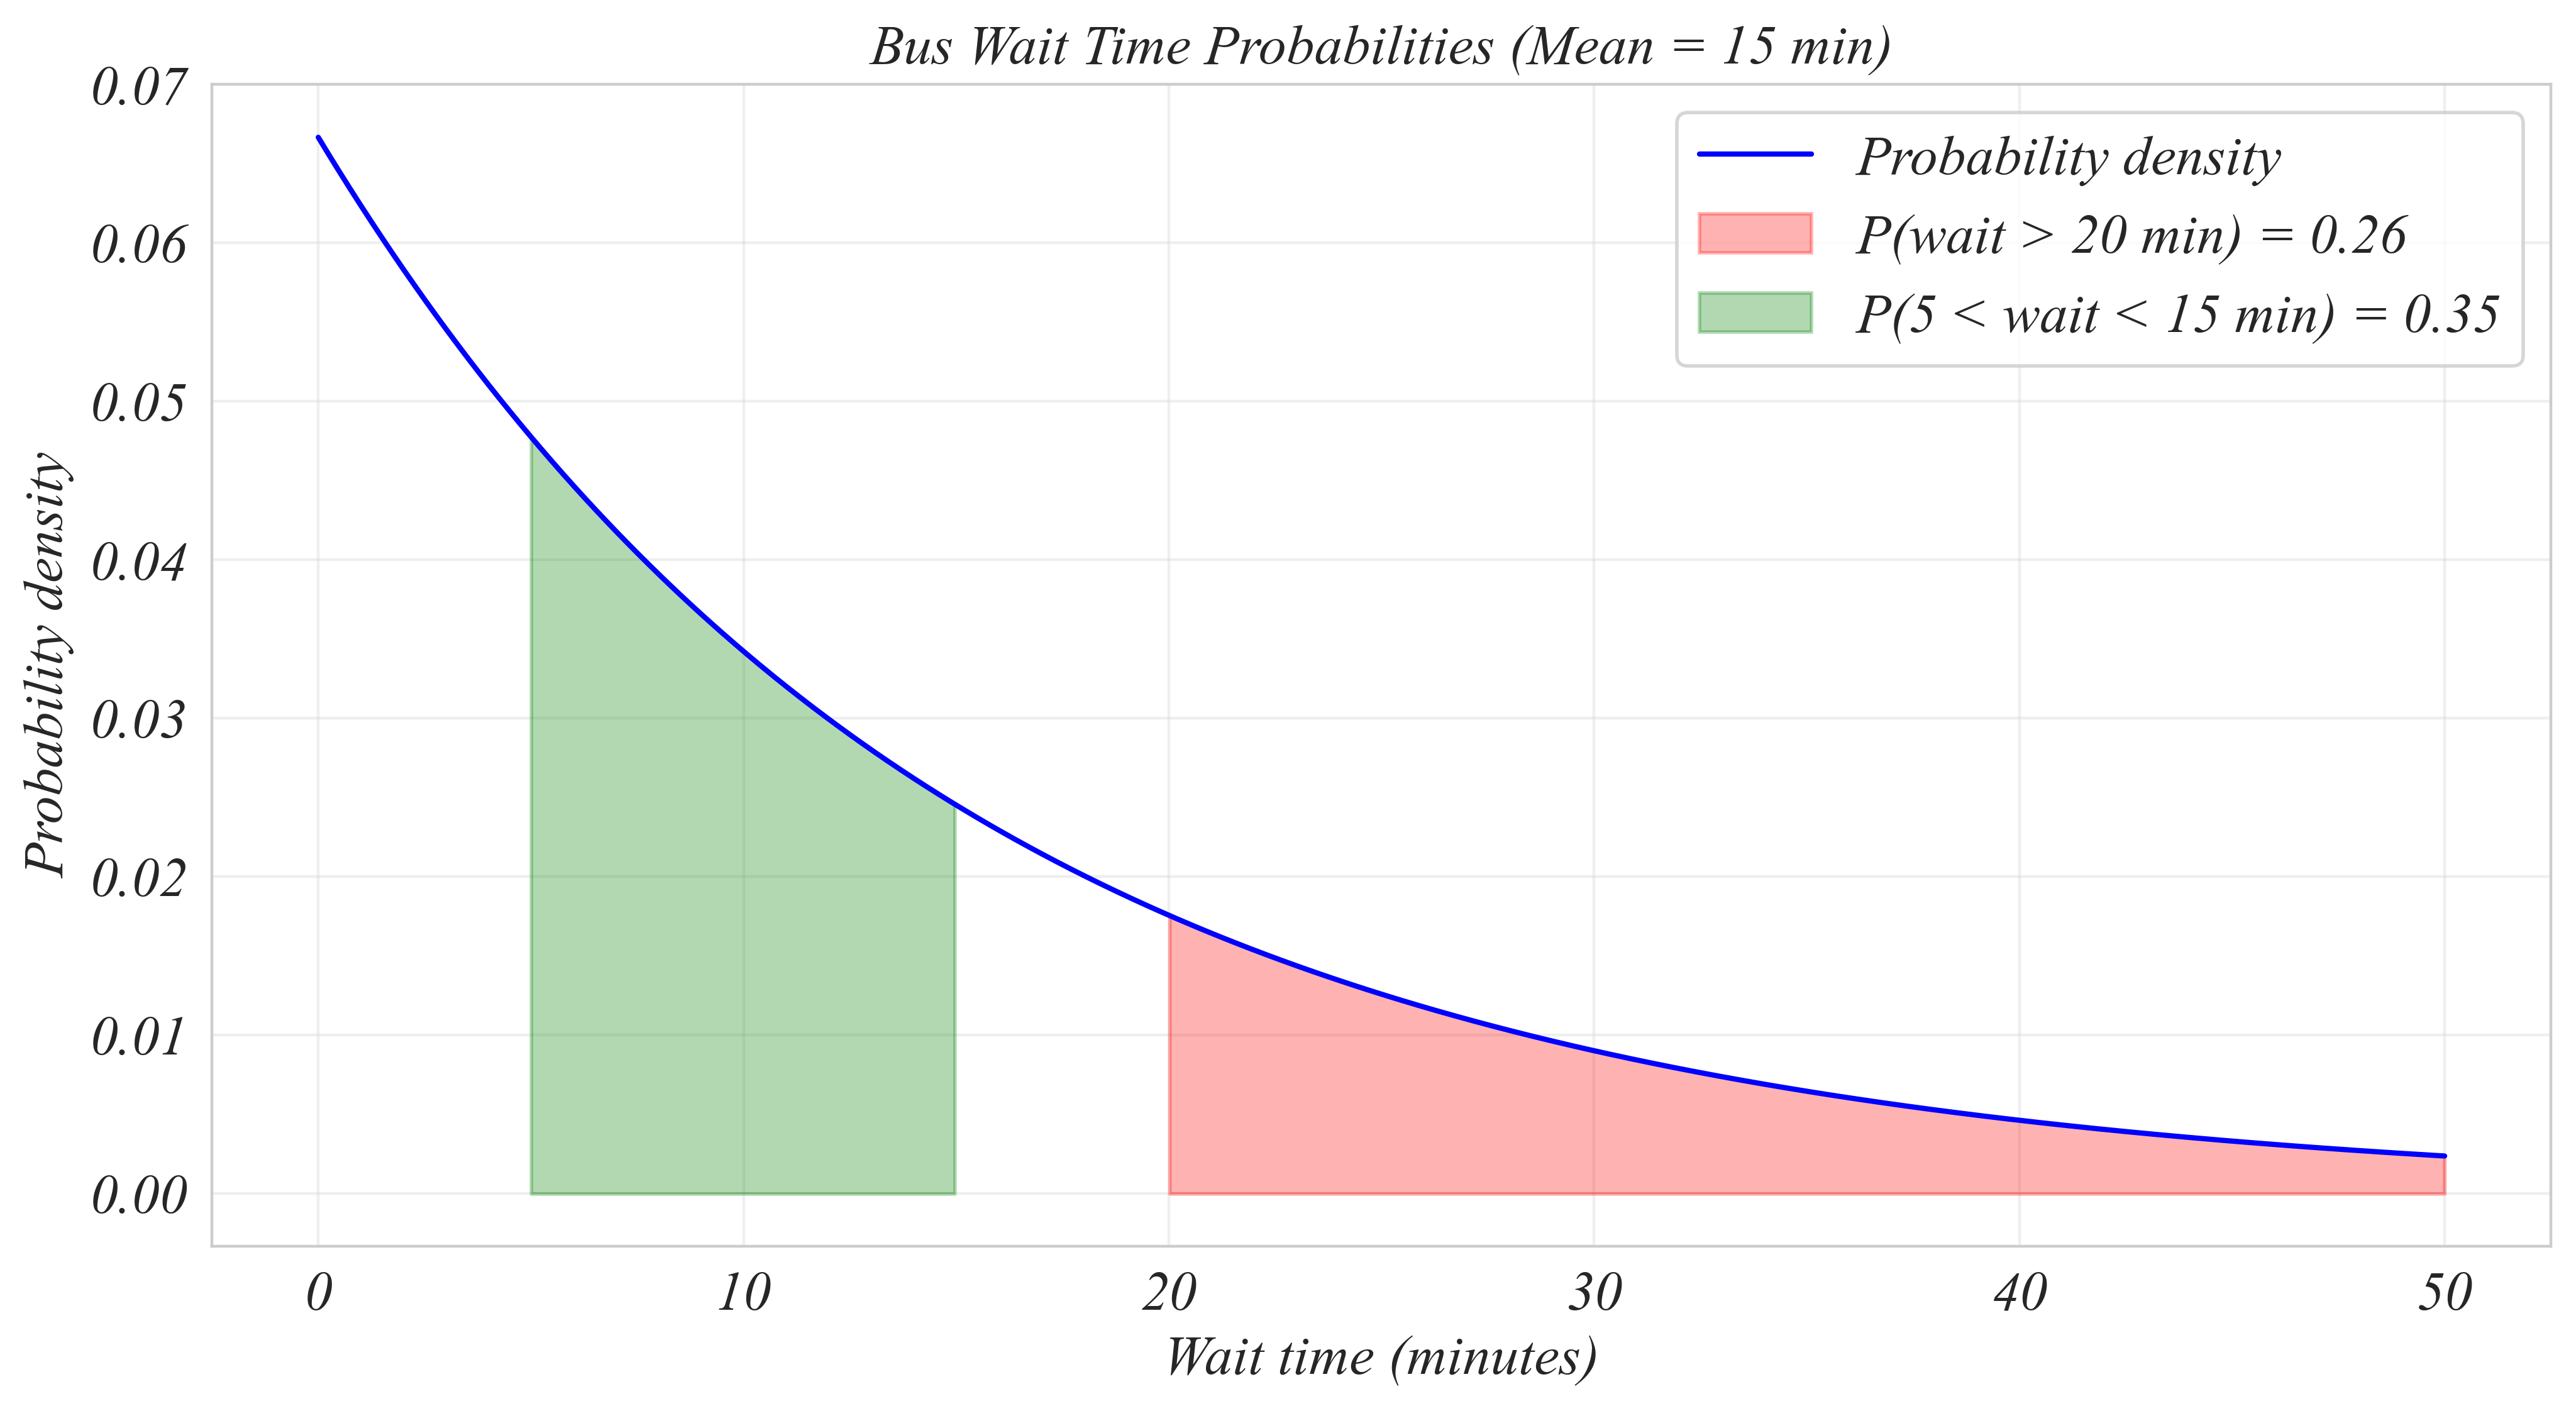

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
mean_time = 15  # mean time between buses in minutes
x = np.linspace(0, 50, 1000)  # x-axis points for plotting
y = stats.expon.pdf(x, scale=mean_time)  # exponential pdf

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the full exponential curve
plt.plot(x, y, 'b-', label='Probability density')

# Shade area for P(wait > 20)
x_tail = x[x >= 20]
y_tail = stats.expon.pdf(x_tail, scale=mean_time)
plt.fill_between(x_tail, y_tail, alpha=0.3, color='red', 
                 label='P(wait > 20 min) = {:.2f}'.format(
                     np.exp(-20/mean_time)))

# Shade area for P(5 < wait < 15)
x_middle = x[(x >= 5) & (x <= 15)]
y_middle = stats.expon.pdf(x_middle, scale=mean_time)
plt.fill_between(x_middle, y_middle, alpha=0.3, color='green',
                 label='P(5 < wait < 15 min) = {:.2f}'.format(
                     np.exp(-5/mean_time) - np.exp(-15/mean_time)))

plt.title('Bus Wait Time Probabilities (Mean = 15 min)')
plt.xlabel('Wait time (minutes)')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True, alpha=0.3)

# Print probabilities and expected wait time
print(f"Expected wait time: {mean_time/2:.1f} minutes")
print(f"P(wait > 20 min): {np.exp(-20/mean_time):.3f}")
print(f"P(5 < wait < 15 min): {np.exp(-5/mean_time) - np.exp(-15/mean_time):.3f}")

# Calculate probabilities for different wait times
wait_times = [5, 10, 15, 20, 30]
print("\nProbability of waiting more than:")
for t in wait_times:
    prob = np.exp(-t/mean_time)
    print(f"{t:2d} minutes: {prob:.3f}")

plt.savefig('Part_3_1/i/bus_wait_times.png')